<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**`Kaggle - Shelter Animal Outcomes`**](https://www.kaggle.com/competitions/shelter-animal-outcomes) 🚀

# 📚 Libraries

In [1]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np
import gzip

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn import set_config; set_config(display="diagram")  

#  🐈 Dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
data_test = pd.read_csv('test.csv')
data_test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [4]:
print(f'The shape of the data_train dataset is: {data_train.shape}')
print(f'The shape of the data_test dataset is: {data_test.shape}')

The shape of the data_train dataset is: (26729, 10)
The shape of the data_test dataset is: (11456, 8)


In [5]:
print(data_train.dtypes.value_counts())
print('--'*50)
print(data_test.dtypes.value_counts())

object    10
dtype: int64
----------------------------------------------------------------------------------------------------
object    7
int64     1
dtype: int64


# 📊 Data visualisation/analysis

🐈‍⬛ Let's see the types of animals in the dataset

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AnimalType', ylabel='count'>

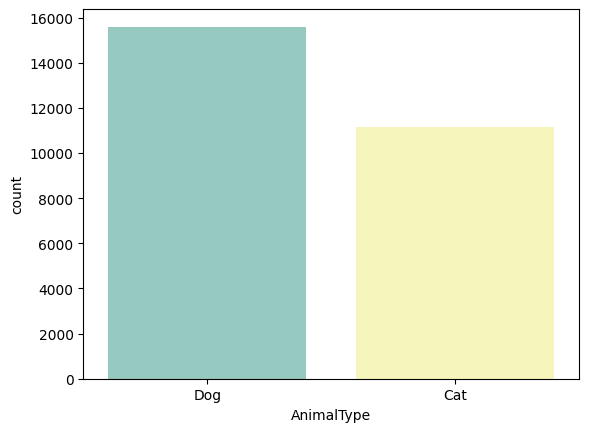

In [6]:
sns.countplot(data_train.AnimalType, palette='Set3')

🐈 What is the distribution of the outcomes for the animals?

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

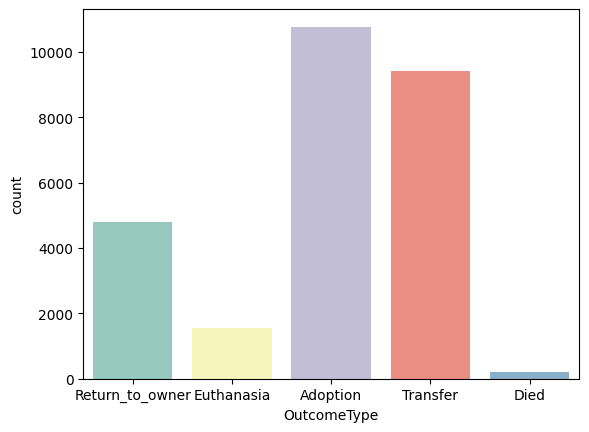

In [7]:
sns.countplot(data_train.OutcomeType, palette='Set3')

The vast majority of animals are getting either adopted or transfered

Another column interesting to show would be SexuponOutcome

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SexuponOutcome', ylabel='count'>

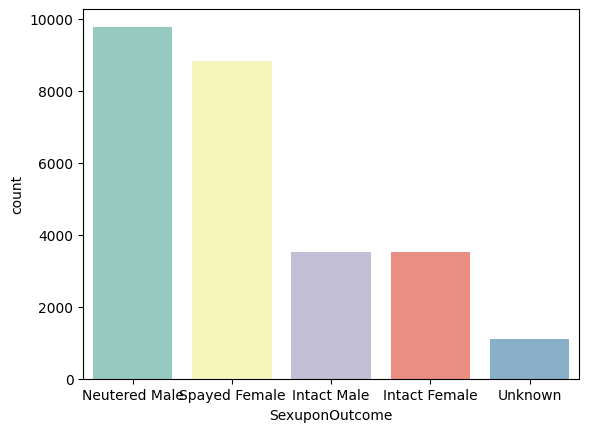

In [8]:
sns.countplot(data_train.SexuponOutcome, palette='Set3')

In this plot, we see two informations displayed: whether the animal is a male/female, and if it has been spayed/neutered or not<br />
The other columns are not that meaningful to plot

We can then divide this column into multiple ones

In [9]:
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'Male'
    if x.find('Female') >= 0: return 'Female'
    return 'Unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Neutered') >= 0: return 'Neutered'
    if x.find('Spayed') >= 0: return 'Spayed'
    if x.find('Intact') >= 0: return 'Intact'
    return 'Unknown'

In [10]:
data_train['Sex'] = data_train.SexuponOutcome.apply(get_sex)
data_train['Neutered'] = data_train.SexuponOutcome.apply(get_neutered)
data_test['Sex'] = data_test.SexuponOutcome.apply(get_sex)
data_test['Neutered'] = data_test.SexuponOutcome.apply(get_neutered)

In [11]:
data_train.drop('SexuponOutcome', axis=1, inplace=True)
data_test.drop('SexuponOutcome', axis=1, inplace=True)

In [12]:
print(f"The proportion of Female is: {(data_train['Sex']=='Female').sum()/len(data_train)}")
print(f"The proportion of Male is: {(data_train['Sex']=='Male').sum()/len(data_train)}")

The proportion of Female is: 0.46133413146769425
The proportion of Male is: 0.4977365408357963


The column 'Breed' gives indication on the animal too: whether that animal is pure race or mixed

In [13]:
def get_mix(x):
    x=str(x)
    if x.find('Mix') >= 0: return 'Mix'
    return 'Not'
data_train['Breed'] = data_train.Breed.apply(get_mix)
data_test['Breed'] = data_test.Breed.apply(get_mix)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Breed', ylabel='count'>

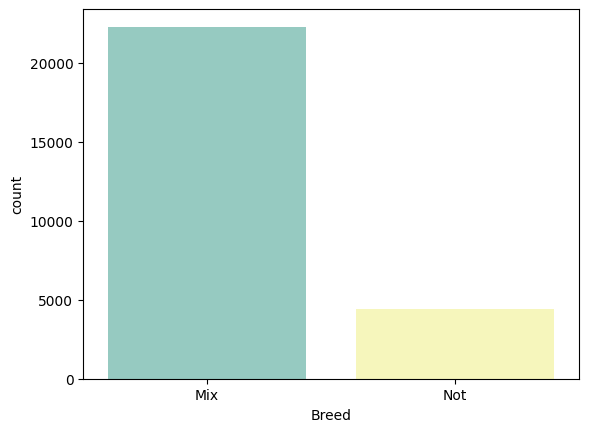

In [14]:
sns.countplot(data_train.Breed, palette='Set3')

We can see the mix are a much larger part of the shelter animals

But how much do these parameters influence the outcome?

<AxesSubplot:xlabel='Sex', ylabel='count'>

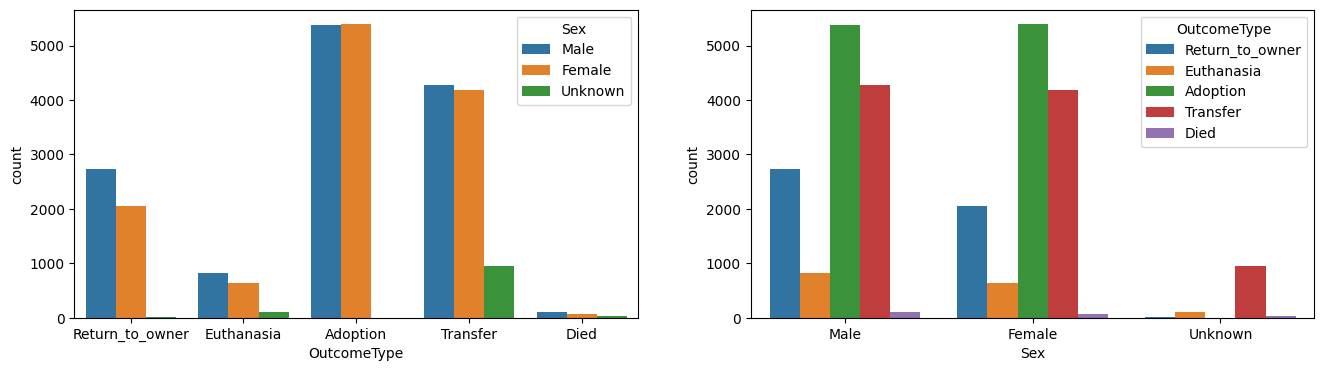

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=data_train, x='Sex',hue='OutcomeType', ax=ax2)

We can see that the sex of the animal does not really matter in the outcome

<AxesSubplot:xlabel='AnimalType', ylabel='count'>

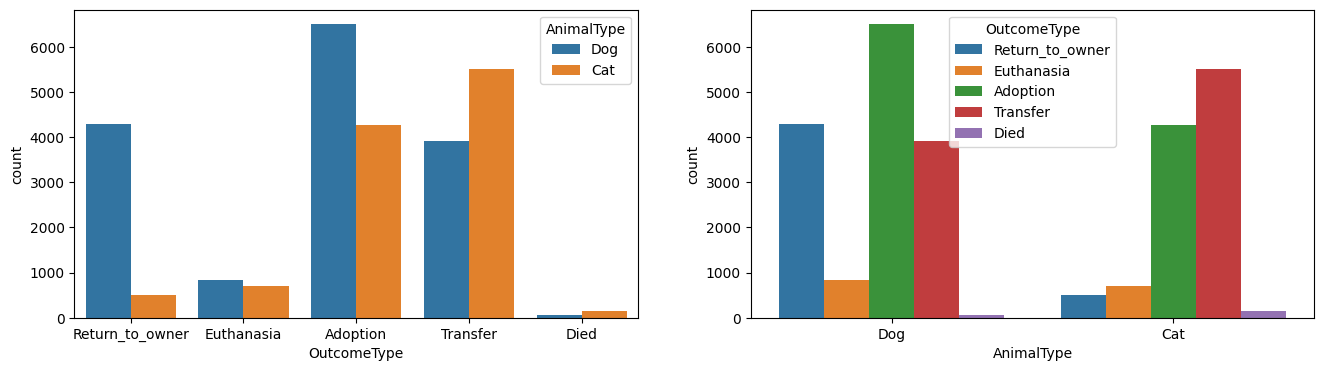

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=data_train, x='AnimalType',hue='OutcomeType', ax=ax2)

However, the type of the animal does: dogs are most likely to be adopted or returned to its owner while cats are most likely to be transfered

<AxesSubplot:xlabel='Breed', ylabel='count'>

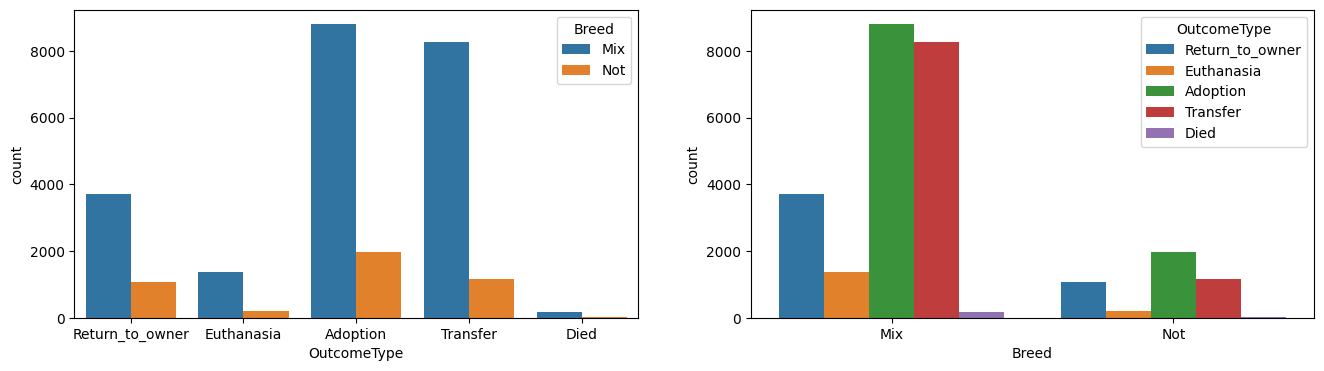

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='Breed', ax=ax1)
sns.countplot(data=data_train, x='Breed',hue='OutcomeType', ax=ax2)

The breed does not play a significant part in the process even with the disparities in the graphs, the proportions are already very different from the start

<AxesSubplot:xlabel='Neutered', ylabel='count'>

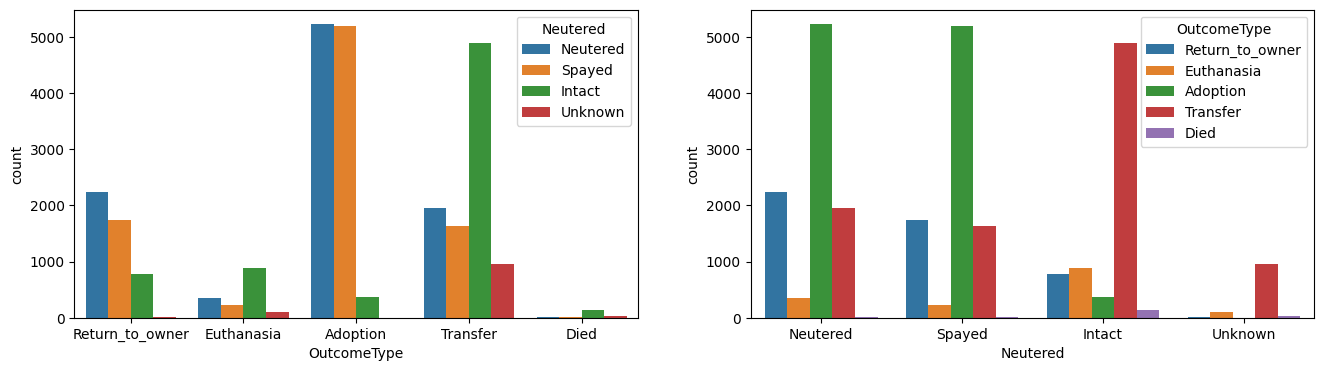

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data_train, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=data_train, x='Neutered',hue='OutcomeType', ax=ax2)

Last but not least: animals left intact are much higher chances of being either euthanised or transfered

# 🏛️ Classification model

In [19]:
data_train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,1 year,Mix,Brown/White,Male,Neutered
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,1 year,Mix,Cream Tabby,Female,Spayed
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,2 years,Mix,Blue/White,Male,Neutered
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,3 weeks,Mix,Blue Cream,Male,Intact
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,2 years,Not,Tan,Male,Neutered
...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,1 month,Mix,Brown Tabby/White,Male,Intact
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,3 months,Mix,Brown Tabby,Female,Spayed
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,4 years,Mix,White/Tan,Male,Neutered
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,4 weeks,Mix,Black,Male,Intact


## ⌚ Convert DateTime to numerical features

In [20]:
train_time = pd.to_datetime(data_train['DateTime'])
test_time = pd.to_datetime(data_test['DateTime'])

In [21]:
data_train['Year'] = train_time.dt.year
data_train['Month'] = train_time.dt.month
data_train['Day'] = train_time.dt.day
data_train['Hour'] = train_time.dt.hour
data_train['Minute'] = train_time.dt.minute
data_train.drop('DateTime', axis=1, inplace=True)

In [22]:
data_test['Year'] = test_time.dt.year
data_test['Month'] = test_time.dt.month
data_test['Day'] = test_time.dt.day
data_test['Hour'] = test_time.dt.hour
data_test['Minute'] = test_time.dt.minute
data_test.drop('DateTime', axis=1, inplace=True)

In [23]:
data_test

,ID,Name,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute
0,1,Summer,Dog,10 months,Mix,Red/White,Female,Intact,2015,10,12,12,15
1,2,Cheyenne,Dog,2 years,Not,Black/Tan,Female,Spayed,2014,7,26,17,59
2,3,Gus,Cat,1 year,Mix,Brown Tabby,Male,Neutered,2016,1,13,12,20
3,4,Pongo,Dog,4 months,Mix,Tricolor,Male,Intact,2013,12,28,18,12
4,5,Skooter,Dog,2 years,Mix,White,Male,Neutered,2015,9,24,17,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,11452,NaN,Cat,2 months,Mix,Black,Male,Neutered,2014,7,8,14,50
11452,11453,NaN,Cat,2 weeks,Mix,Blue,Female,Intact,2014,10,21,12,57
11453,11454,NaN,Cat,1 year,Mix,Calico,Female,Intact,2014,9,29,9,0
11454,11455,Rambo,Dog,6 years,Mix,Black/Tan,Male,Neutered,2015,9,5,17,16


## 📅 Convert AgeuponOutcome to numerical feature

In [28]:
data_train['AgeuponOutcome'].fillna('1 month', inplace=True)
data_test['AgeuponOutcome'].fillna('1 month', inplace=True)

In [37]:
def get_age(x):
    try:
        age_list = x.split()
    except:
        return None
    ages = int(age_list[0])
    if(age_list[1].find("s")):
        age_list[1] = age_list[1].replace("s","")
    if age_list[1] == "day":
        return ages
    elif (age_list[1] == "week"):
        return ages*7
    elif (age_list[1] == "month"):
        return ages*30
    elif (age_list[1] == "year"):
        return ages*365
data_train['Age_in_days'] = data_train.AgeuponOutcome.apply(get_age)
data_test['Age_in_days'] = data_test.AgeuponOutcome.apply(get_age)

In [39]:
data_train.drop(columns=['AgeuponOutcome', 'Age'], inplace=True)
data_test.drop(columns=['AgeuponOutcome', 'Age'], inplace=True)

In [41]:
data_train

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute,Age_in_days
0,A671945,Hambone,Return_to_owner,NaN,Dog,Mix,Brown/White,Male,Neutered,2014,2,12,18,22,365
1,A656520,Emily,Euthanasia,Suffering,Cat,Mix,Cream Tabby,Female,Spayed,2013,10,13,12,44,365
2,A686464,Pearce,Adoption,Foster,Dog,Mix,Blue/White,Male,Neutered,2015,1,31,12,28,730
3,A683430,NaN,Transfer,Partner,Cat,Mix,Blue Cream,Male,Intact,2014,7,11,19,9,21
4,A667013,NaN,Transfer,Partner,Dog,Not,Tan,Male,Neutered,2013,11,15,12,52,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,Transfer,Partner,Cat,Mix,Brown Tabby/White,Male,Intact,2015,5,14,11,56,30
26725,A718934,NaN,Transfer,SCRP,Cat,Mix,Brown Tabby,Female,Spayed,2016,1,20,18,59,90
26726,A698128,Zeus,Adoption,NaN,Dog,Mix,White/Tan,Male,Neutered,2015,3,9,13,33,1460
26727,A677478,NaN,Transfer,Partner,Cat,Mix,Black,Male,Intact,2014,4,27,12,22,28
